In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df=pd.read_csv("/content/Fifa 23 Players Data.csv")
data=df
data


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [ ]:
data.isnull().sum()

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

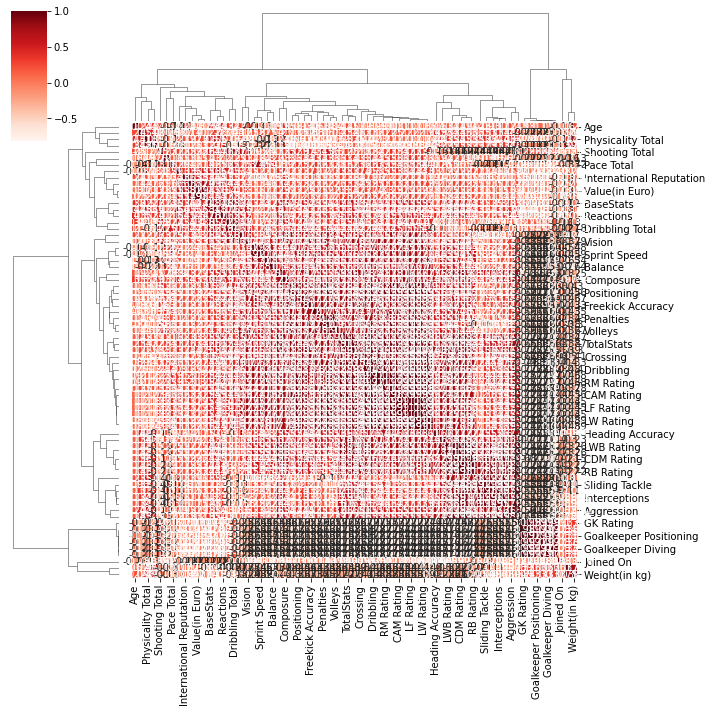

In [ ]:
sns.clustermap(data.corr(),annot=True,cmap='Reds')

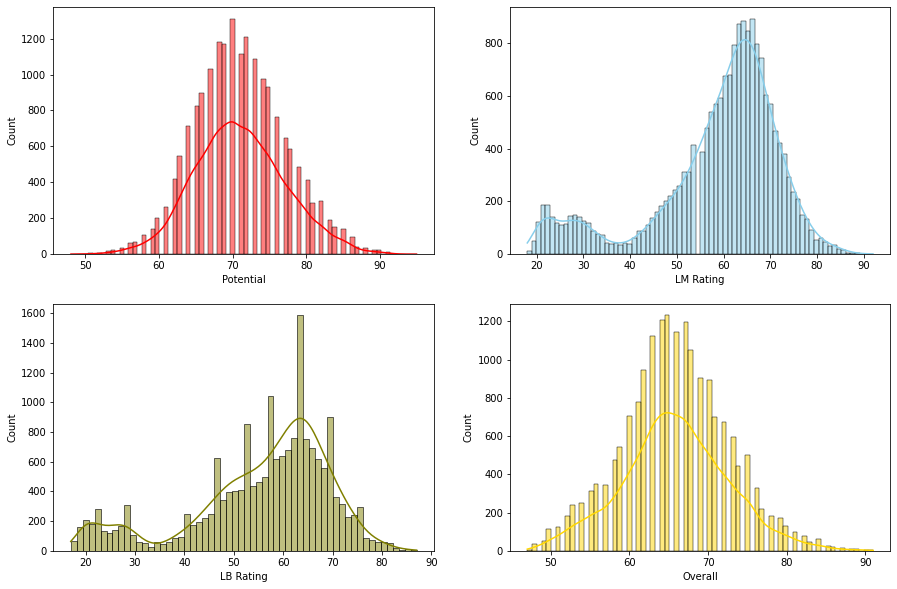

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= data, x="Potential", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="LM Rating", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="LB Rating", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="Overall", kde=True, color="gold", ax=axs[1,1])
 
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

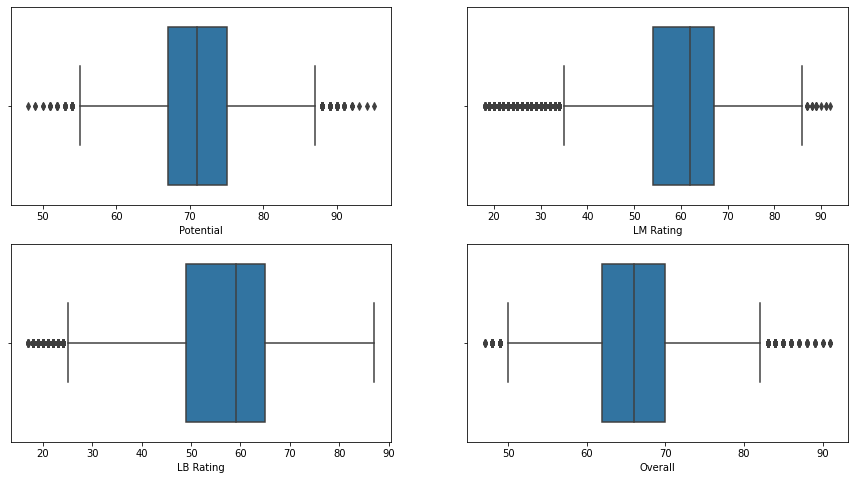

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['Potential'], ax = axs[0,0])
sns.boxplot(data['LM Rating'], ax = axs[0,1])
sns.boxplot(data['LB Rating'], ax = axs[1,0])
sns.boxplot(data['Overall'], ax = axs[1,1])

In [ ]:
qh25, qh50, qh75 = np.percentile(data['Potential'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

data = data[(data['Potential'] > minh) & (data['Potential'] < maxh)]

In [ ]:
qh25, qh50, qh75 = np.percentile(data['LM Rating'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

data = data[(data['LM Rating'] > minh) & (data['LM Rating'] < maxh)]

In [ ]:
qh25, qh50, qh75 = np.percentile(data['LB Rating'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

data = data[(data['LB Rating'] > minh) & (data['LB Rating'] < maxh)]

In [ ]:
qh25, qh50, qh75 = np.percentile(data['Overall'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

data = data[(data['Overall'] > minh) & (data['Overall'] < maxh)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

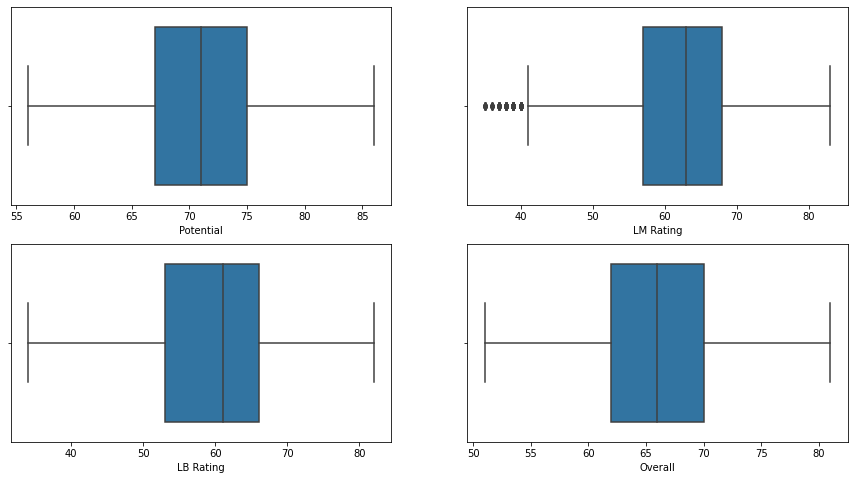

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['Potential'], ax = axs[0,0])
sns.boxplot(data['LM Rating'], ax = axs[0,1])
sns.boxplot(data['LB Rating'], ax = axs[1,0])
sns.boxplot(data['Overall'], ax = axs[1,1])

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15989 entries, 277 to 18332
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     15989 non-null  object
 1   Full Name                    15989 non-null  object
 2   Overall                      15989 non-null  int64 
 3   Potential                    15989 non-null  int64 
 4   Value(in Euro)               15989 non-null  int64 
 5   Positions Played             15989 non-null  object
 6   Best Position                15989 non-null  object
 7   Nationality                  15989 non-null  object
 8   Image Link                   15989 non-null  object
 9   Age                          15989 non-null  int64 
 10  Height(in cm)                15989 non-null  int64 
 11  Weight(in kg)                15989 non-null  int64 
 12  TotalStats                   15989 non-null  int64 
 13  BaseStats                    

In [ ]:
numerical = data
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

<ipython-input-13-2a1521ee2322>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_vals = numerical.skew()


Overall           -0.009517
Potential          0.129875
Value(in Euro)     4.330248
Age                0.406362
Height(in cm)     -0.008435
                    ...    
RWB Rating        -0.254496
LB Rating         -0.326724
CB Rating         -0.353275
RB Rating         -0.326724
GK Rating         12.458511
Length: 71, dtype: float64

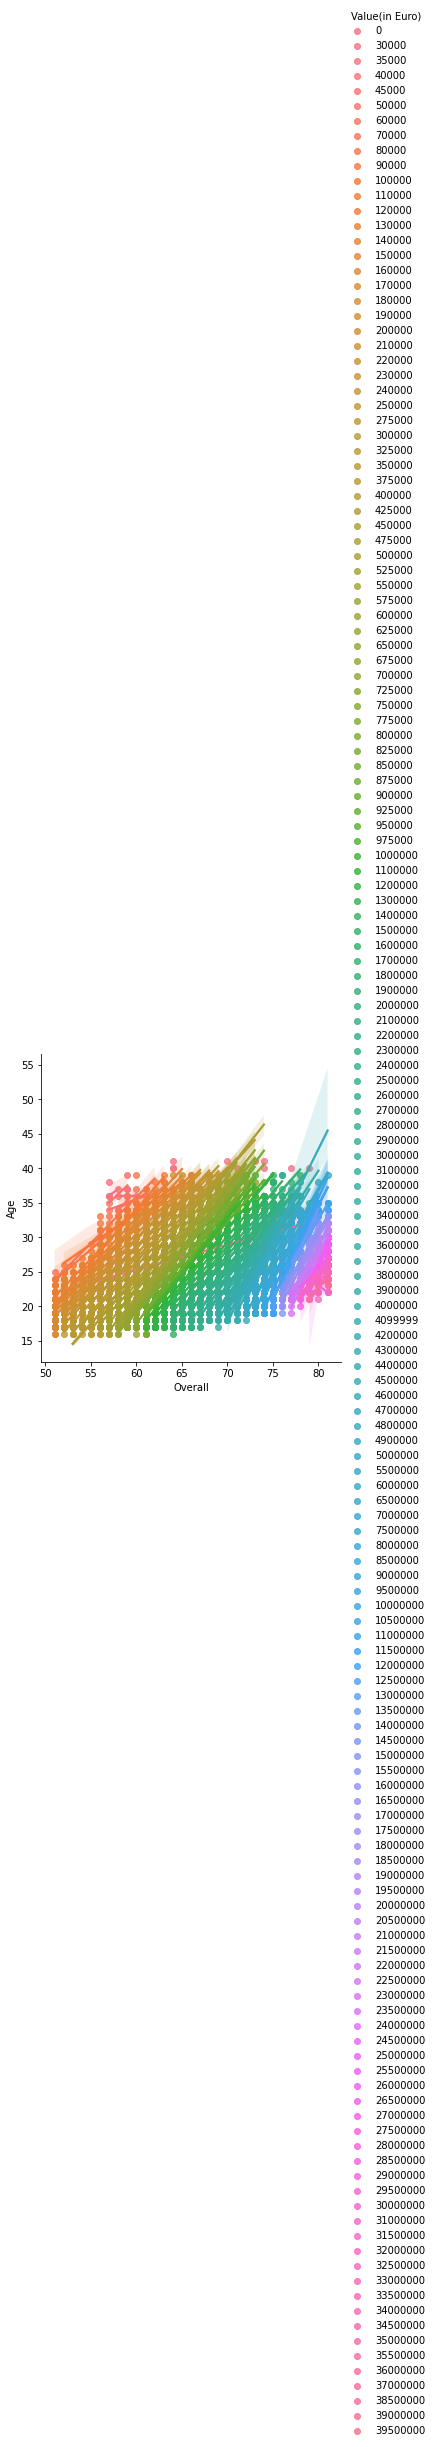

In [ ]:
sns.lmplot(x='Overall',y='Age',data=data,hue='Value(in Euro)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

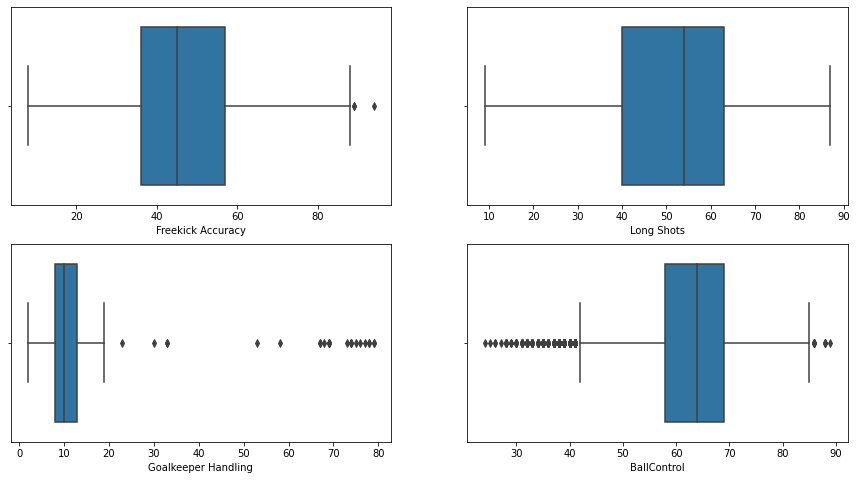

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['Freekick Accuracy'], ax = axs[0,0])
sns.boxplot(data['Long Shots'], ax = axs[0,1])
sns.boxplot(data['Goalkeeper Handling'], ax = axs[1,0])
sns.boxplot(data['BallControl'], ax = axs[1,1])

In [ ]:
qh25, qh50, qh75 = np.percentile(data['BallControl'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

data = data[(data['BallControl'] > minh) & (data['BallControl'] < maxh)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

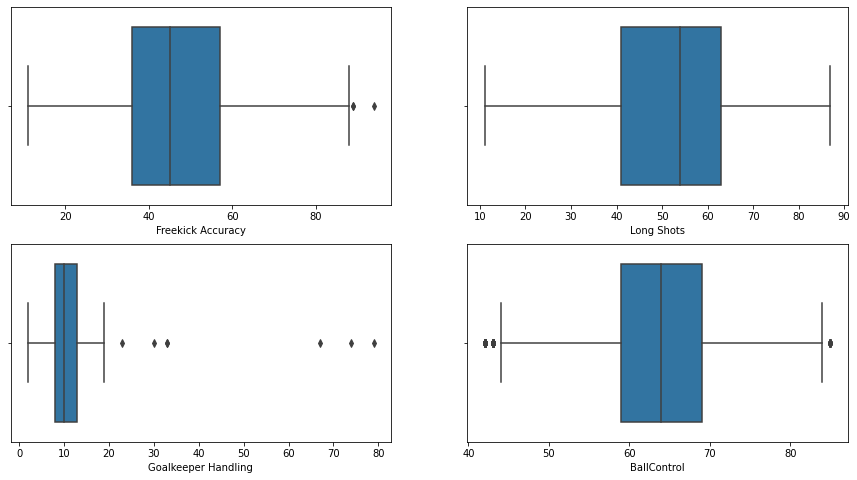

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['Freekick Accuracy'], ax = axs[0,0])
sns.boxplot(data['Long Shots'], ax = axs[0,1])
sns.boxplot(data['Goalkeeper Handling'], ax = axs[1,0])
sns.boxplot(data['BallControl'], ax = axs[1,1])

In [ ]:
sns.pairplot(data, hue = 'BallControl', kind='kde')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/usr/local/lib/python3.8/dist-packages/seaborn/distr